In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


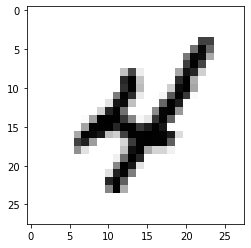

In [3]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

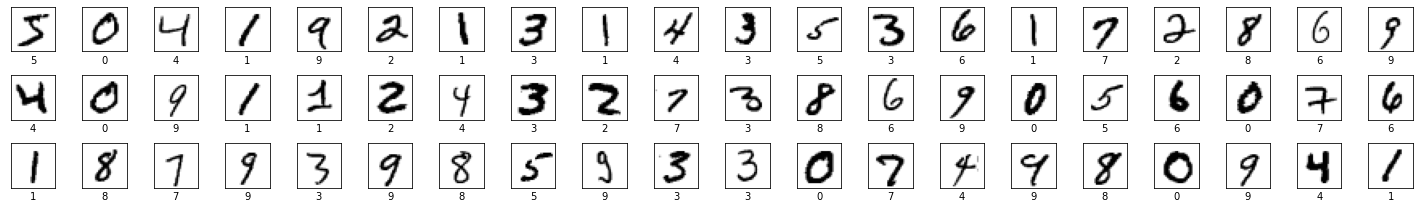

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [5]:
# normalize data
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

# without normalization data
x2_train = x_train.reshape(-1, 28,28,1)
x2_test = x_test.reshape(-1, 28,28,1)

# print shape
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of x_train: {x2_train.shape}")
print(f"Shape of x_test: {x2_test.shape}")

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)
Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


Image (#9): Which is digit '4'


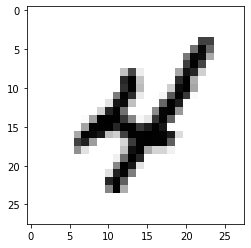

In [6]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [7]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

##**Adam Optimizer**

In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
# normalize data
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 6s 8ms/step - loss: 0.2606 - accuracy: 0.9199 - val_loss: 0.0742 - val_accuracy: 0.9793
Epoch 2/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0629 - val_accuracy: 0.9813
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0415 - val_accuracy: 0.9887
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0438 - val_accuracy: 0.9877
Epoch 5/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0399 - val_accuracy: 0.9879


In [10]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [11]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
# without normalize data
h2 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 0.2711 - accuracy: 0.9184 - val_loss: 0.0891 - val_accuracy: 0.9729
Epoch 2/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0644 - accuracy: 0.9794 - val_loss: 0.0601 - val_accuracy: 0.9833
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0464 - val_accuracy: 0.9875
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 5/5
375/375 [==============================] - 2s 7ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0405 - val_accuracy: 0.9883


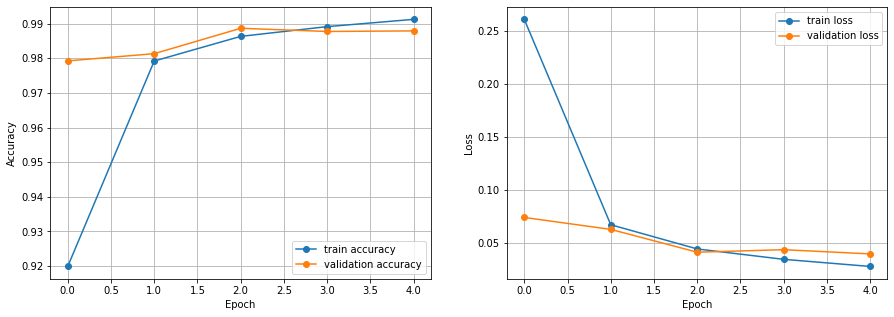

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

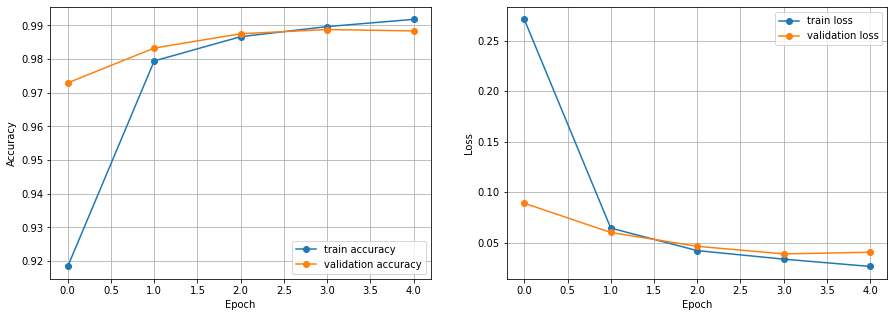

In [14]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9912

Test accuracy: 0.9911999702453613


In [16]:
# without normalization
test_loss2, test_acc2 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9912

Test accuracy: 0.9911999702453613


In [17]:
predictions = model.predict(x_test)

In [18]:
# without normalization
predictions2 = model.predict(x2_test)

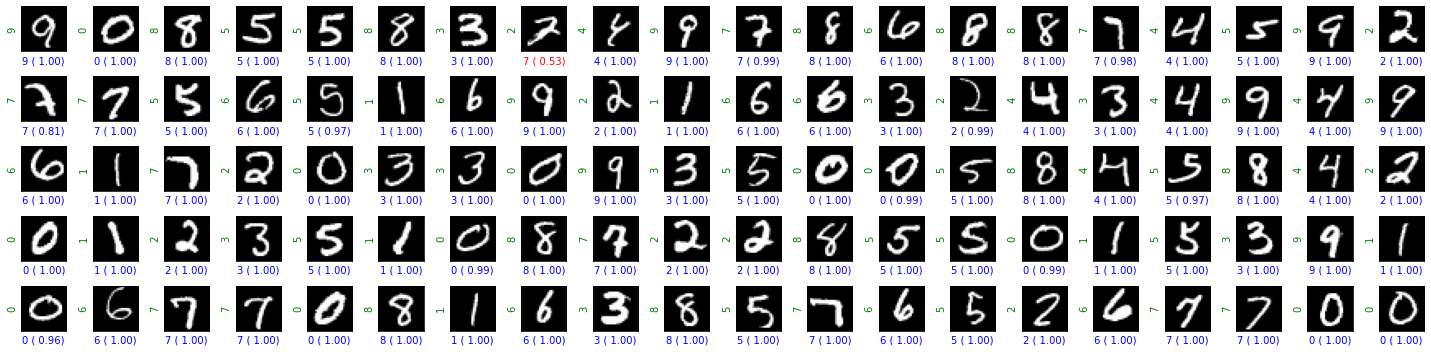

In [19]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

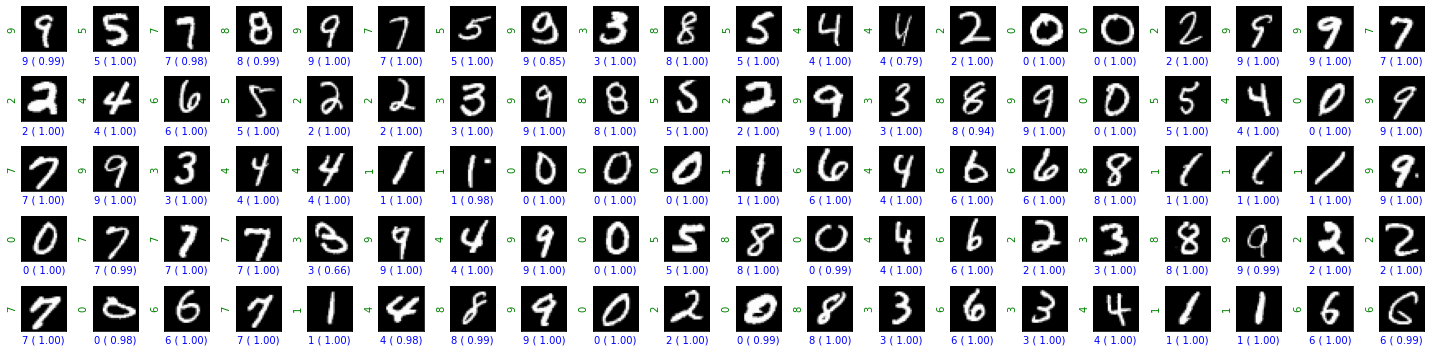

In [20]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions2 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions2[i]) 
        confidence = predictions2[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

##**SGD Optimizer**

In [21]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [22]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
# normalize data
h3 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 1.9522 - accuracy: 0.3974 - val_loss: 0.7706 - val_accuracy: 0.7542
Epoch 2/5
375/375 [==============================] - 2s 7ms/step - loss: 0.4416 - accuracy: 0.8642 - val_loss: 0.2851 - val_accuracy: 0.9138
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.2715 - accuracy: 0.9167 - val_loss: 0.2099 - val_accuracy: 0.9365
Epoch 4/5
375/375 [==============================] - 2s 6ms/step - loss: 0.2006 - accuracy: 0.9386 - val_loss: 0.1647 - val_accuracy: 0.9526
Epoch 5/5
375/375 [==============================] - 2s 7ms/step - loss: 0.1601 - accuracy: 0.9515 - val_loss: 0.1492 - val_accuracy: 0.9560


In [24]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [25]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [26]:
# without normalize data
h4 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 1.9329 - accuracy: 0.4116 - val_loss: 0.7684 - val_accuracy: 0.7626
Epoch 2/5
375/375 [==============================] - 2s 7ms/step - loss: 0.4720 - accuracy: 0.8535 - val_loss: 0.3951 - val_accuracy: 0.8707
Epoch 3/5
375/375 [==============================] - 2s 7ms/step - loss: 0.2789 - accuracy: 0.9148 - val_loss: 0.2330 - val_accuracy: 0.9265
Epoch 4/5
375/375 [==============================] - 2s 7ms/step - loss: 0.2036 - accuracy: 0.9373 - val_loss: 0.1680 - val_accuracy: 0.9508
Epoch 5/5
375/375 [==============================] - 2s 7ms/step - loss: 0.1574 - accuracy: 0.9523 - val_loss: 0.1383 - val_accuracy: 0.9579


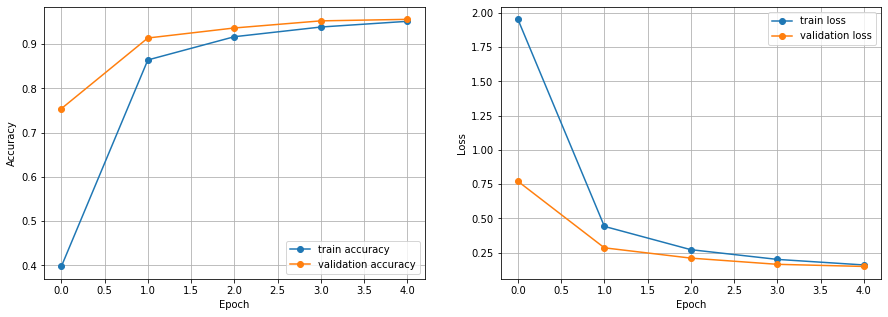

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

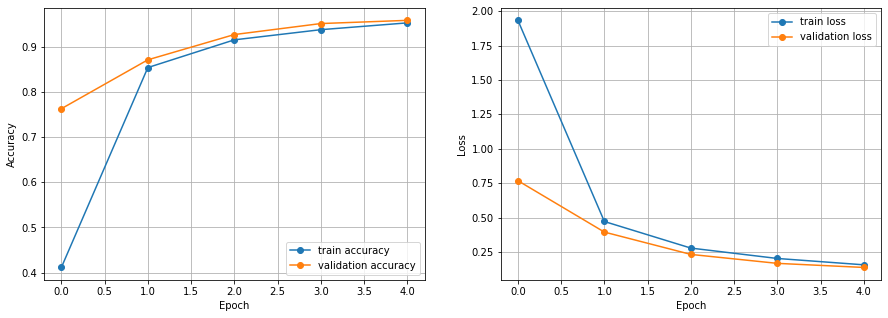

In [28]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h4.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h4.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h4.history['loss'], 'o-', label='train loss')
plt.plot(h4.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss3, test_acc3 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1241 - accuracy: 0.9636

Test accuracy: 0.9911999702453613


In [30]:
# without normalization
test_loss4, test_acc4 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.1241 - accuracy: 0.9636

Test accuracy: 0.9911999702453613


In [31]:
predictions3 = model.predict(x_test)

# without normalization
predictions4 = model.predict(x2_test)

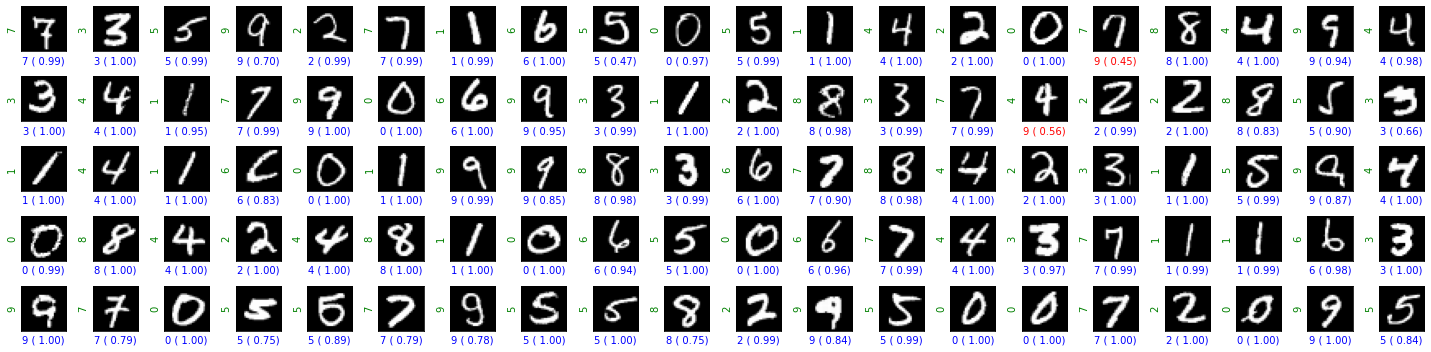

In [32]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions3 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions3[i]) 
        confidence = predictions3[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

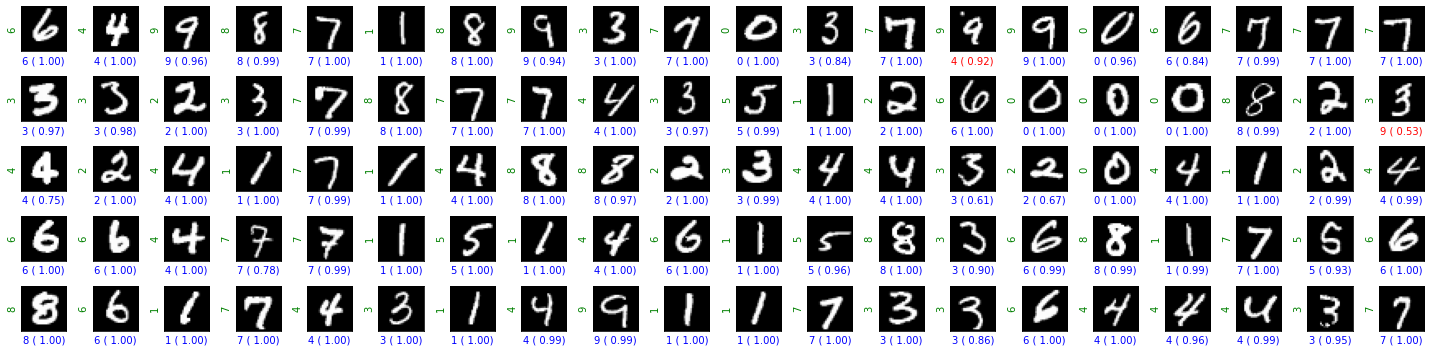

In [33]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions4 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions4[i]) 
        confidence = predictions4[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

##**RMSProp Optimizer**

In [34]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)              

In [35]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [36]:
# normalize data
h5 = model.fit(x=x_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 7ms/step - loss: 0.2722 - accuracy: 0.9111 - val_loss: 0.0765 - val_accuracy: 0.9762
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0670 - accuracy: 0.9792 - val_loss: 0.0453 - val_accuracy: 0.9868
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0435 - accuracy: 0.9864 - val_loss: 0.0536 - val_accuracy: 0.9844
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0389 - val_accuracy: 0.9886
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0403 - val_accuracy: 0.9883


In [37]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    # hidden layer
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 128)         36992     
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)              

In [38]:
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [39]:
# without normalize data
h6 = model.fit(x=x2_train, y=y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 3s 8ms/step - loss: 0.2626 - accuracy: 0.9167 - val_loss: 0.1108 - val_accuracy: 0.9650
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0624 - accuracy: 0.9805 - val_loss: 0.0508 - val_accuracy: 0.9846
Epoch 3/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 4/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0485 - val_accuracy: 0.9859
Epoch 5/5
375/375 [==============================] - 3s 7ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0359 - val_accuracy: 0.9885


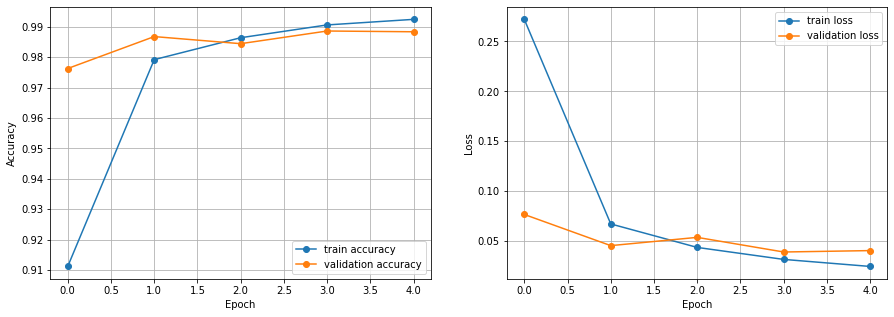

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h5.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h5.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h5.history['loss'], 'o-', label='train loss')
plt.plot(h5.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

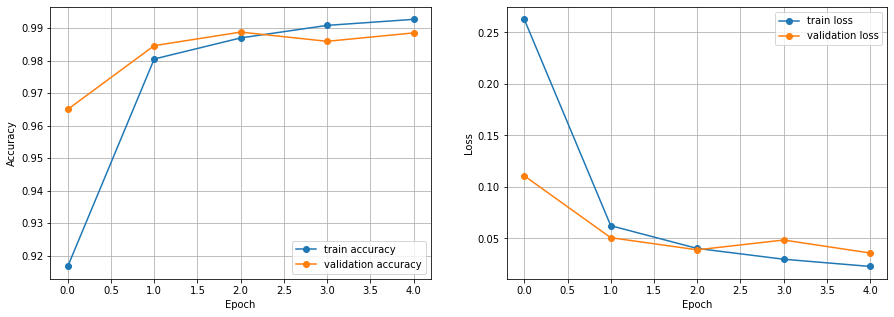

In [41]:
# without normalization
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h6.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h6.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h6.history['loss'], 'o-', label='train loss')
plt.plot(h6.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [42]:
test_loss5, test_acc5 = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

# without normalization
test_loss6, test_acc6 = model.evaluate(x2_test, y_test)
print('\nTest accuracy:', test_acc2)

313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9884

Test accuracy: 0.9911999702453613
313/313 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9884

Test accuracy: 0.9911999702453613


In [43]:
predictions5 = model.predict(x_test)

# without normalization
predictions6 = model.predict(x2_test)

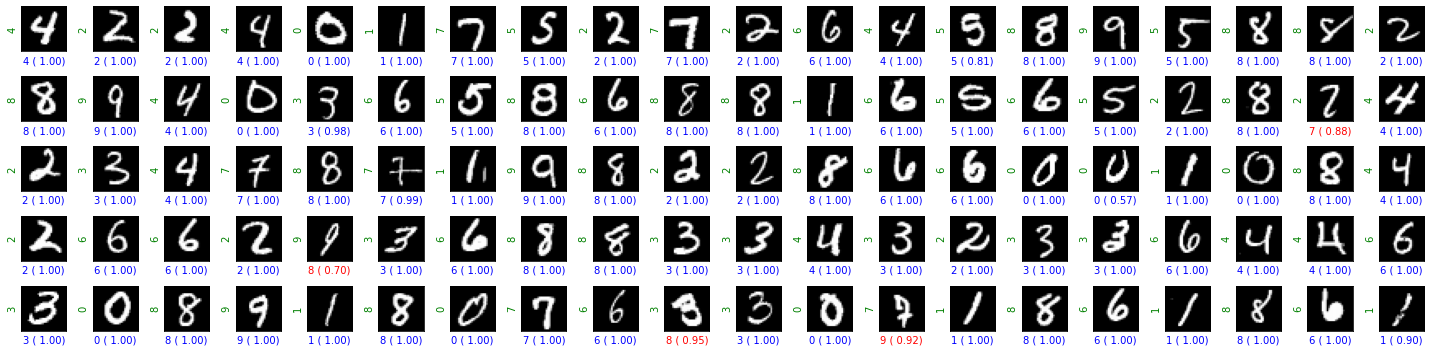

In [44]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions5 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions5[i]) 
        confidence = predictions5[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

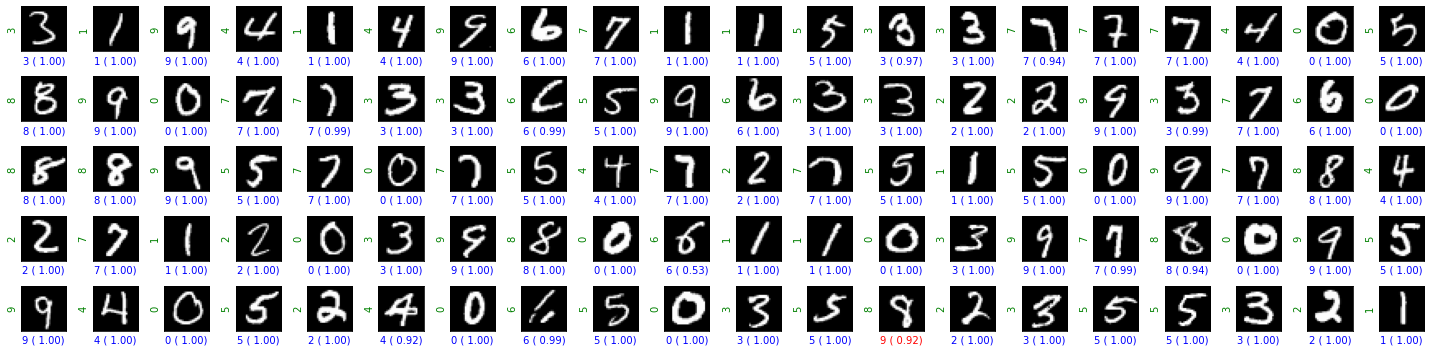

In [45]:
# without normalization
ROWS = 5
COLS = 20

random_indices = random.sample(range(x2_test.shape[0]), ROWS*COLS)
sample_images = x2_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions6 = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions6[i]) 
        confidence = predictions6[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()